In [1]:
# What king of case study it is?
# More than 20 features: 
# Output column: labels as 0 and 1. 0: The person is non defaulter and 1 says person is defaulter
# summary: 0: Non-defaulter
#          1: Defaulter
# Berkshire Hathway: We increased the profit by 2%
# We decreased defaulters by 40%

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# data = pd.read_csv('/Users/bhupendrakumar/Documents/Personal/Data Einstein Assignments/Anonymize_Loan_Default_data.csv')



In [4]:
data = pd.read_csv('/Users/Tushnik/Documents/DataEinstein folder/Anonymize_Loan_Default_data.csv',encoding='latin1')


In [5]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [6]:
# Observations: It's a classification problem statement
# Pre-processing: We need to remove Unnamed: 0 column
# pre-process the term, emp_length.

In [7]:
# data = pd.read_csv('/Users/bhupendrakumar/Documents/Personal/Data Einstein Assignments/Anonymize_Loan_Default_data.csv',
#                    encoding='latin1', index_col=0)

In [8]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [11]:
data.shape
# Observations: We have 35 independent variables and 1 dependent variable(Output variable)(repay_fail)

(38480, 36)

In [12]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [13]:
# Checking the data type of the variables

In [14]:
data['loan_status']

0                                              Charged Off
1        Does not meet the credit policy. Status:Fully ...
2                                              Charged Off
3                                               Fully Paid
4                                               Fully Paid
                               ...                        
38475                                           Fully Paid
38476                                           Fully Paid
38477                                           Fully Paid
38478                                           Fully Paid
38479                                           Fully Paid
Name: loan_status, Length: 38480, dtype: object

In [15]:
data.dtypes

id                          int64
member_id                   int64
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs               float64
earliest_cr_line           object
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                 object
total_acc                 float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prnc

In [16]:
data['repay_fail'].value_counts()

0    32651
1     5829
Name: repay_fail, dtype: int64

In [17]:
# Observation: The dataset is imbalanced


In [18]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38475    False
38476    False
38477    False
38478    False
38479    False
Length: 38480, dtype: bool

In [19]:
data.duplicated().sum()

0

In [20]:
duplicate = data[data.duplicated(subset=['member_id'])]
 
print("Duplicate Rows :")

Duplicate Rows :


In [21]:
duplicate

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [22]:
#data.drop_duplicates(subset='member_id', keep='first', inplace=True)

# Null Value Analysis

In [23]:
data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pym

In [24]:
# Drop the columns: mths_since_last_delinq,next_pymnt_d
data.drop(["mths_since_last_delinq","next_pymnt_d"],axis=1,inplace=True)

In [25]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                1
funded_amnt              1
funded_amnt_inv          1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
zip_code                 0
addr_state               0
dti                      0
delinq_2yrs              1
earliest_cr_line         0
inq_last_6mths           1
open_acc                 1
pub_rec                  1
revol_bal                4
revol_util              59
total_acc                1
total_pymnt              1
total_pymnt_inv          1
total_rec_prncp          1
total_rec_int            1
last_pymnt_d            71
last_pymnt_amnt          1
last_credit_pull_d       3
repay_fail               0
dtype: int64

In [26]:
# dropping all the null values
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
repay_fail             0
dtype: int64

In [28]:
(38480-data.shape[0])/38480

0.029132016632016634

In [29]:
" %1234% ".strip()

'%1234%'

In [30]:
data['revol_util']

0        0.00%
1         21.30%
2         99.90%
3         47.20%
4             0%
          ...   
38475     73.50%
38476     39.70%
38477     62.20%
38478     53.30%
38479     62.60%
Name: revol_util, Length: 37359, dtype: object

In [31]:
data.shape

(37359, 34)

In [32]:
for index in range(38480):
    try:
        data['revol_util'][index] = data['revol_util'][index].replace("\x93","").replace('\x94',"").strip("%")
    except Exception as e:
        continue

C:\Users\Tushnik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,...,0.00,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,...,21.30,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,...,99.90,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,...,47.20,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,...,0,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,...,73.50,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,...,39.70,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,...,62.20,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,...,53.30,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [34]:
data.dtypes

id                       int64
member_id                int64
loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
last_cre

In [35]:
data['revol_util'].str.strip('%').astype(float)

0         0.0
1        21.3
2        99.9
3        47.2
4         0.0
         ... 
38475    73.5
38476    39.7
38477    62.2
38478    53.3
38479    62.6
Name: revol_util, Length: 37359, dtype: float64

In [36]:
# Convert percentage strings to numerical values
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)

In [37]:
data['revol_util'].dtype

dtype('float64')

In [38]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,...,0.0,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,...,73.5,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,...,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,...,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,...,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [40]:
# data['revol_util'].str.strip('%').astype('float')

In [42]:
# data['revol_util'].str.extract('(\d+)')

In [43]:
data['emp_length']

0         < 1 year
1          4 years
2          4 years
3        10+ years
4        10+ years
           ...    
38475      3 years
38476      9 years
38477    10+ years
38478       1 year
38479      7 years
Name: emp_length, Length: 37359, dtype: object

In [44]:
data['emp_length'].str.extract('(\d+)').astype(float)

,0
0,1.0
1,4.0
2,4.0
3,10.0
4,10.0
...,...
38475,3.0
38476,9.0
38477,10.0
38478,1.0


In [45]:
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['term'] = data['term'].str.extract('(\d+)').astype(float)

In [46]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,RENT,...,0.0,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,RENT,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,RENT,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,MORTGAGE,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,RENT,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,849205,1060907,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,RENT,...,73.5,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,852914,1065048,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,RENT,...,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,519553,671637,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,MORTGAGE,...,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,825638,1034448,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,RENT,...,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [47]:
data['zip_code']

0        000xx
1        487xx
2        115xx
3        751xx
4        112xx
         ...  
38475    805xx
38476    442xx
38477    073xx
38478    061xx
38479    484xx
Name: zip_code, Length: 37359, dtype: object

In [48]:
data.dtypes

id                       int64
member_id                int64
loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                   float64
int_rate               float64
installment            float64
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
last_cre

In [49]:
data['issue_d']

0        Dec-99
1        Jul-10
2        Jun-10
3        Sep-11
4        Sep-11
          ...  
38475    Aug-11
38476    Aug-11
38477    May-10
38478    Jul-11
38479    Nov-11
Name: issue_d, Length: 37359, dtype: object

In [50]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [51]:
data['issue_d']

0       1999-12-01
1       2010-07-01
2       2010-06-01
3       2011-09-01
4       2011-09-01
           ...    
38475   2011-08-01
38476   2011-08-01
38477   2010-05-01
38478   2011-07-01
38479   2011-11-01
Name: issue_d, Length: 37359, dtype: datetime64[ns]

In [52]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          float64
int_rate                      float64
installment                   float64
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
total_pymnt 

In [53]:
# Encoding the columns

In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [55]:
label_encoder = LabelEncoder()
categorical_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state']


In [56]:
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [57]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,4,...,0.0,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,4,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,4,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,0,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,4,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,849205,1060907,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,4,...,73.5,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,Jun-16,0
38476,852914,1065048,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,4,...,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,Jun-16,0
38477,519553,671637,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,0,...,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,Feb-16,0
38478,825638,1034448,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,4,...,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,Sep-15,0


In [58]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,3.735900e+04,3.735900e+04,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,...,37359.000000,3.735900e+04,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000
mean,6.630819e+05,8.235806e+05,11175.254959,10909.532509,10216.064141,42.180037,12.185886,325.593788,5.047673,2.131508,...,0.056372,1.439157e+04,49.277081,22.156294,12095.234585,11374.017508,9738.676406,2255.427452,2643.667212,0.147889
std,2.197795e+05,2.803453e+05,7409.659787,7151.590405,7141.810716,10.494331,3.699925,209.300192,3.408773,1.935997,...,0.243073,2.202812e+04,28.325817,11.571297,9019.261542,8966.185350,7059.101854,2579.251286,4416.864911,0.354995
min,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.961565e+05,6.350075e+05,5500.000000,5300.000000,4975.000000,36.000000,9.630000,167.540000,2.000000,0.000000,...,0.000000,3.699500e+03,26.000000,13.000000,5537.420011,4890.640000,4500.000000,671.935000,216.150000,0.000000
50%,6.428250e+05,8.226740e+05,10000.000000,9600.000000,8640.053392,36.000000,11.990000,280.700000,4.000000,3.000000,...,0.000000,8.943000e+03,49.800000,20.000000,9810.990176,9064.390000,8000.000000,1356.480000,535.640000,0.000000
75%,8.252090e+05,1.033104e+06,15000.000000,15000.000000,14150.000000,60.000000,14.720000,433.180000,9.000000,4.000000,...,0.000000,1.740200e+04,72.800000,29.000000,16507.996035,15615.455000,13600.000000,2822.370000,3225.395000,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.110000,1305.190000,10.000000,4.000000,...,5.000000,1.207359e+06,119.000000,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [59]:
# Observation:
# Outliers are present in many columns i.e. int_rate, installment, pub_rec, ... 
# We have 28 numeric data type columns
# Drop id and member_id

In [60]:
# Dropping id and memeber_id
data.drop(['id','member_id'],axis=1,inplace=True)

In [61]:
data.shape

(37359, 32)

In [62]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,4,0.0,0,...,0.0,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,Jan-07,1
1,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,4,20004.0,0,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,Jun-16,0
2,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,4,59000.0,0,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,Mar-12,1
3,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,0,53796.0,0,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,Mar-14,0
4,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,4,30000.0,0,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,4,74250.0,2,...,73.5,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,Jun-16,0
38476,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,4,62000.0,1,...,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,Jun-16,0
38477,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,0,95088.0,1,...,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,Feb-16,0
38478,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,4,48720.0,0,...,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,Sep-15,0


In [63]:
# output column= repay_fail
# 1: Defaulter
# 0: Non-Defaulter

In [64]:
data['repay_fail'].value_counts()

0    31834
1     5525
Name: repay_fail, dtype: int64

# EDA (Exploratory Data Analysis)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='int_rate', ylabel='annual_inc'>

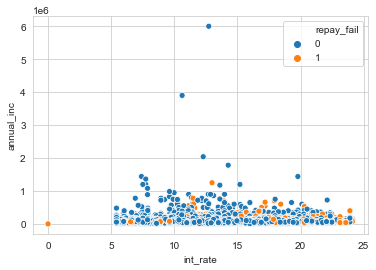

In [66]:
# We use scatter plot amongst two continuous variables
# Bi-variate analysis
sns.set_style('whitegrid')
sns.scatterplot(x='int_rate',y='annual_inc',hue='repay_fail',data=data)

In [67]:
# Univariate analysis:
# When we try to study single variable at a time.

In [68]:
import warnings
warnings.filterwarnings('ignore')

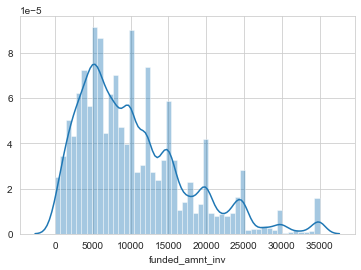

In [69]:
sns.distplot(data['funded_amnt_inv']);

In [70]:
# Observation: It's a right skewed distribution
# outliers are present

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

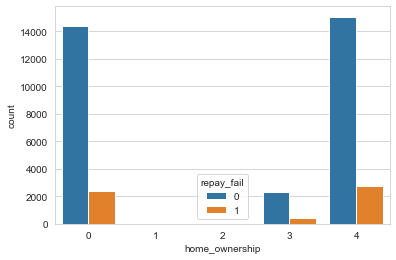

In [71]:
# If I want to compare two categorical variables
# One of the categorical variable is our output feature.
sns.countplot(x='home_ownership',hue='repay_fail',data=data)

In [72]:
data['home_ownership'].value_counts()

4    17779
0    16698
3     2755
2      123
1        4
Name: home_ownership, dtype: int64

In [73]:
data.shape

(37359, 32)

In [74]:
# Outlier analysis

In [75]:
# Handled outliers using z-score
# We will use box-plot method

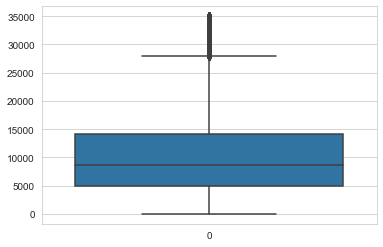

In [76]:
sns.boxplot(data=data['funded_amnt_inv']);

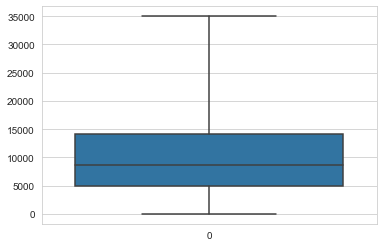

In [77]:
sns.boxplot(data=data['funded_amnt_inv'],whis=2.5);

In [78]:
# IQR = q75 - q25
# upperLimit = q75 + 2*IQR
# lowerLimit = q25 - 2*IQR
import numpy as np

In [79]:
q25,q75=np.percentile(data['funded_amnt_inv'],[25,75])
print(q25,q75)

4975.0 14150.0


In [80]:
q25,q75=np.percentile(data['funded_amnt_inv'],[25,75])
q25, q75 = 4975.0, 14150.0
IQR = q75-q25

upperLimit = q75 + 2*IQR
lowerLimit = q25 - 2*IQR

In [81]:
print(upperLimit,lowerLimit)

32500.0 -13375.0


In [82]:
new_data=data[data['funded_amnt_inv']<=32500]

In [83]:
new_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,4,0.0,0,...,0.0,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,Jan-07,1
1,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,4,20004.0,0,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,Jun-16,0
2,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,4,59000.0,0,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,Mar-12,1
3,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,0,53796.0,0,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,Mar-14,0
4,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,4,30000.0,0,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,4,74250.0,2,...,73.5,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,Jun-16,0
38476,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,4,62000.0,1,...,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,Jun-16,0
38477,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,0,95088.0,1,...,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,Feb-16,0
38478,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,4,48720.0,0,...,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,Sep-15,0


<AxesSubplot:>

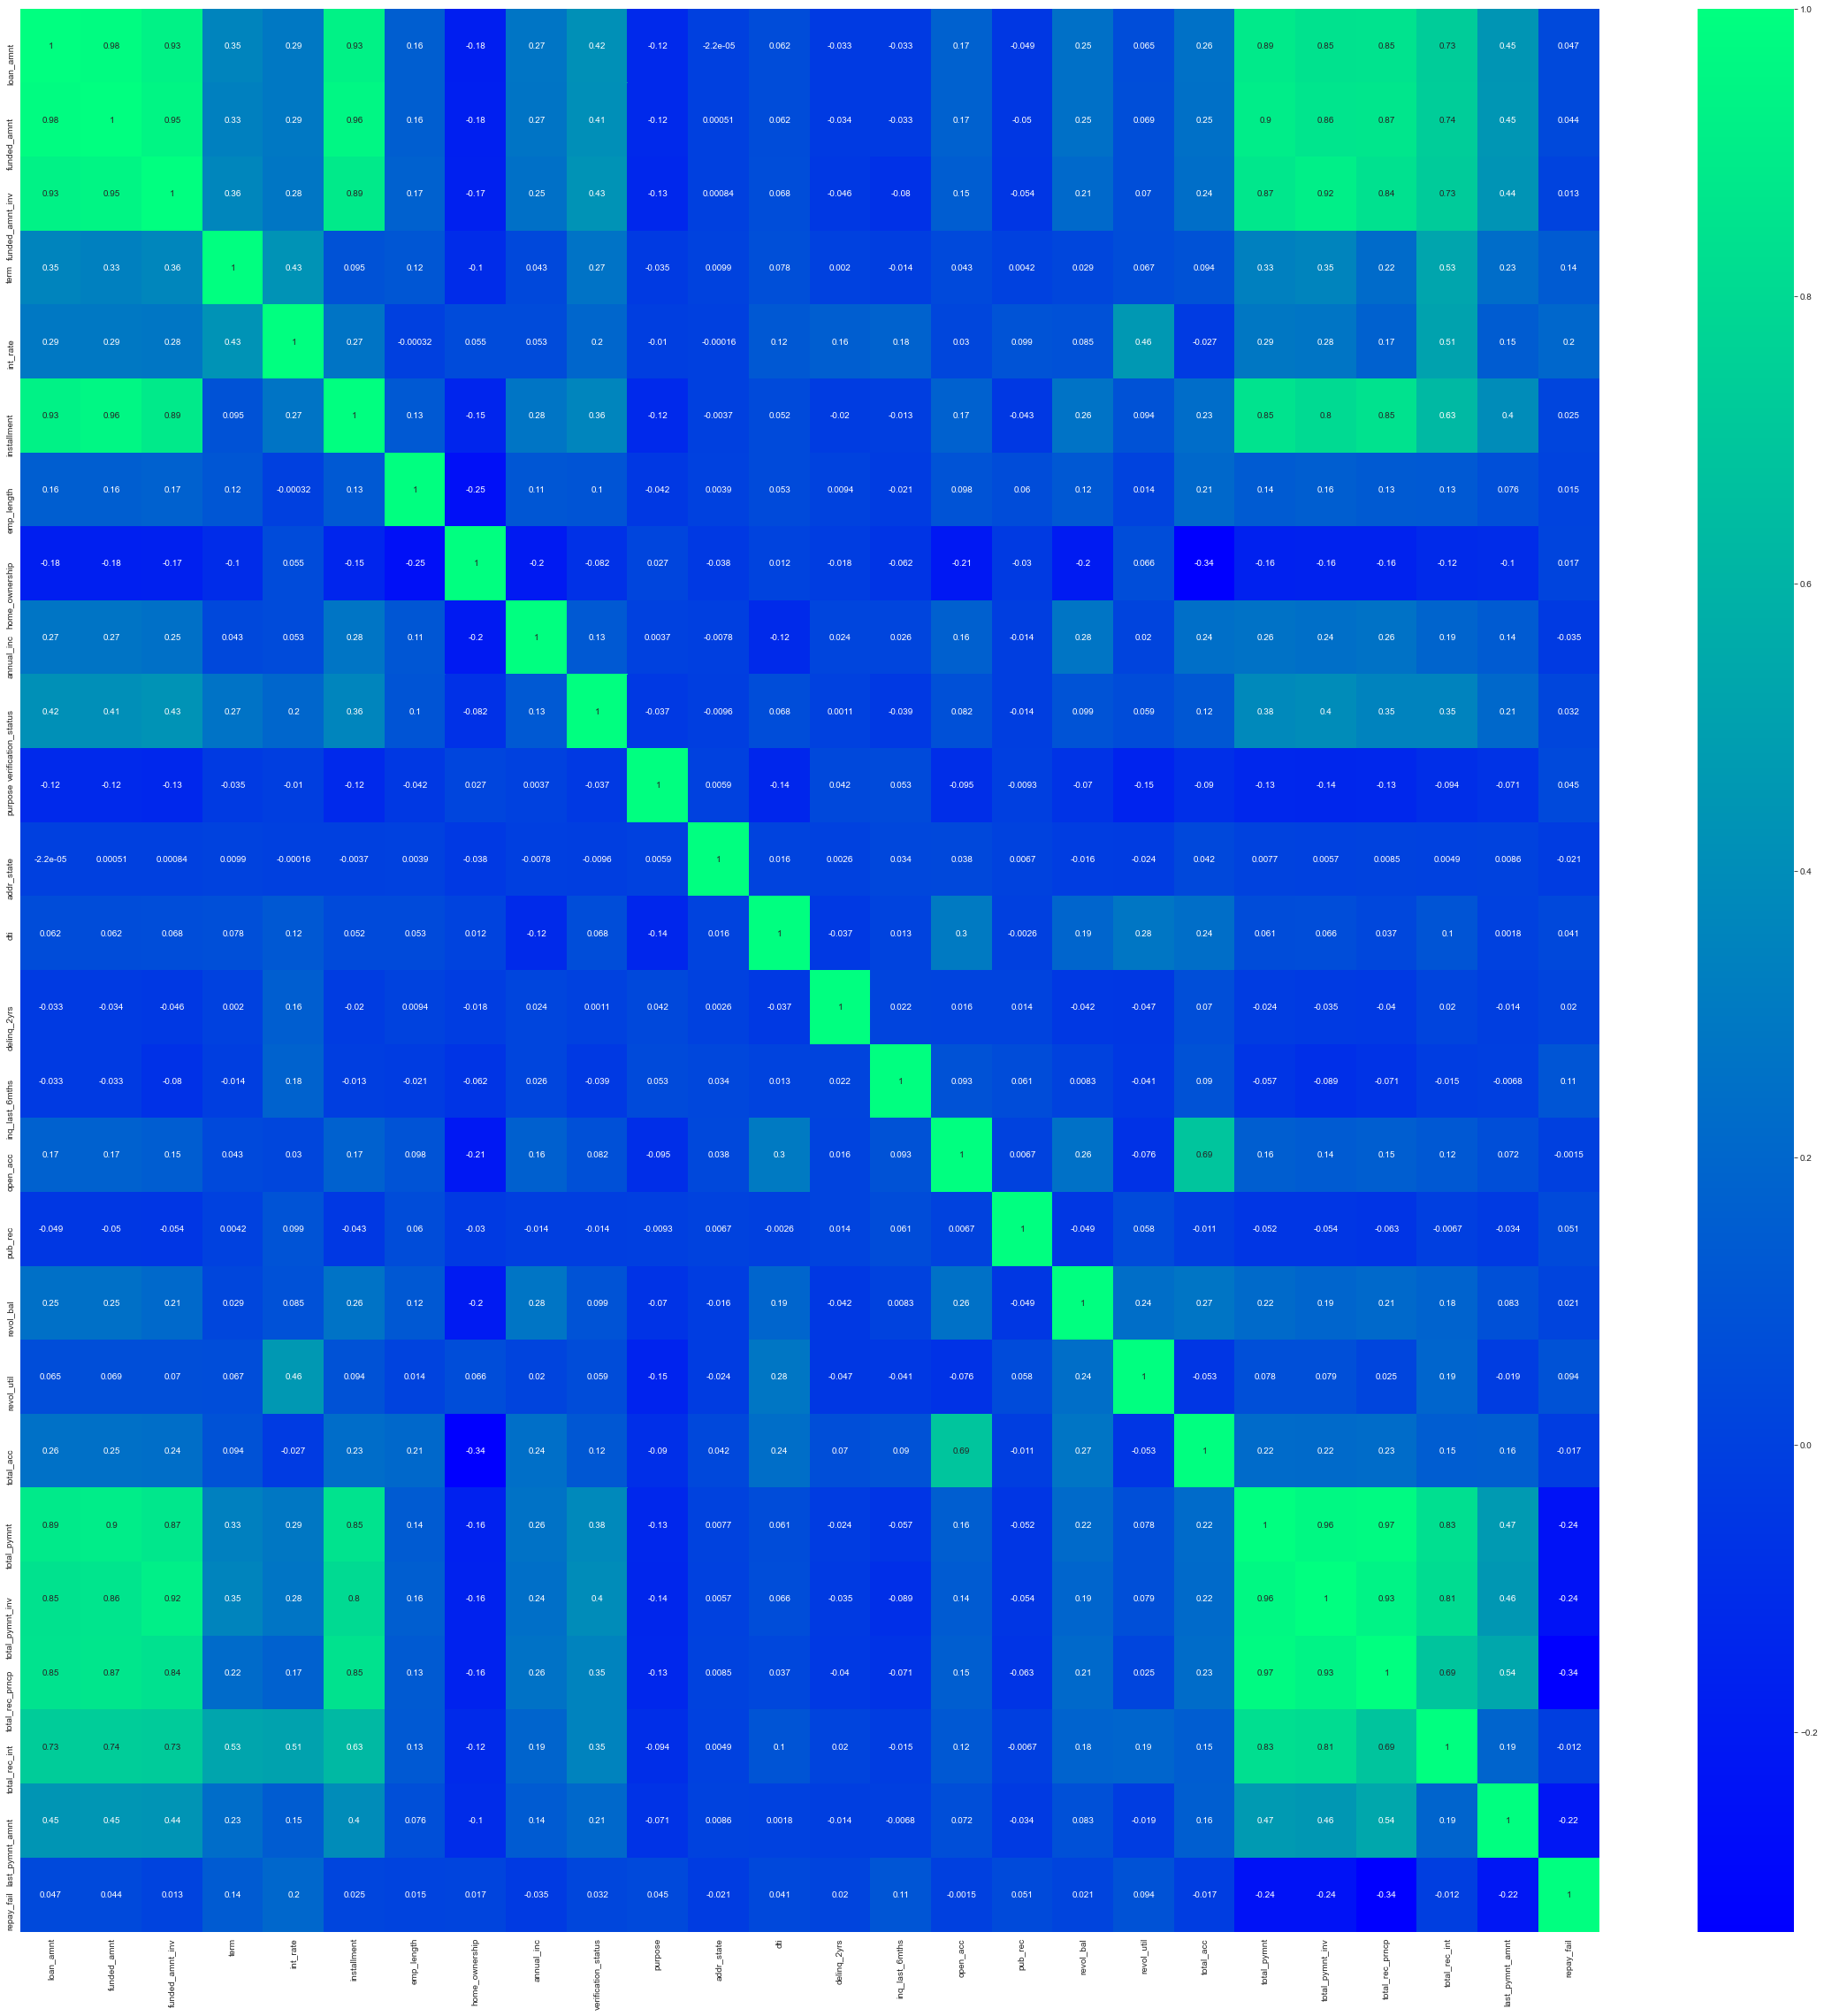

In [84]:
corrMat=data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrMat,annot=True,cmap="winter")

In [85]:
# Observations:
# loan_amnt: total_rec__int, total_rec__prncpl, total_payment_inv,total_payment
# We will remove the loan_amt
# Remove funded_amnt, funded_amnt_inv,installment, total_pymnt,total_payment_inv
# 

## We will get back

In [86]:
# Interpretation

In [87]:
# Import all the supporting libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [88]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [89]:
data['earliest_cr_line']

0        Jan-01
1        Aug-05
2        Apr-94
3        Mar-98
4        Jan-75
          ...  
38475    Jan-00
38476    Apr-99
38477    Dec-95
38478    Jul-07
38479    Oct-95
Name: earliest_cr_line, Length: 37359, dtype: object

In [90]:
# Encoding, featurization

In [91]:
X = data.drop(['loan_status','issue_d','last_pymnt_d','last_credit_pull_d','zip_code','earliest_cr_line','repay_fail'],axis=1)
Y=data['repay_fail']


In [92]:
print(X.shape,Y.shape)

(37359, 25) (37359,)


In [93]:
# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=43)


In [94]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29887, 25) (7472, 25) (29887,) (7472,)


In [95]:
model=RandomForestClassifier()

In [96]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
pred = model.predict(x_test)


In [98]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [99]:
y_test

16562    0
17367    0
35599    1
35689    0
7866     0
        ..
6971     0
31942    0
4587     0
21749    0
10922    0
Name: repay_fail, Length: 7472, dtype: int64

In [100]:
accuracy=accuracy_score(pred,y_test)

In [101]:
accuracy

0.9879550321199143

In [102]:
class_report=classification_report(y_test,pred)

In [103]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6343
           1       1.00      0.92      0.96      1129

    accuracy                           0.99      7472
   macro avg       0.99      0.96      0.98      7472
weighted avg       0.99      0.99      0.99      7472



In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [105]:
y_pred_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
print("False positive rate : ",fpr)
print("True positive rate : ",tpr)
print("Thresholds : ",thresh)

False positive rate :  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.57654107e-04 1.57654107e-04
 1.57654107e-04 1.57654107e-04 1.57654107e-04 1.57654107e-04
 1.57654107e-04 3.15308214e-04 3.15308214e-04 3.15308214e-04
 3.15308214e-04 4.72962321e-04 4.72962321e-04 4.72962321e-04
 6.30616428e-04 7.88270534e-04 7.88270534e-04 9.45924641e-04
 1.10357875e-03 1.41888696e-03 2.04950339e-03 3.15308214e-03
 

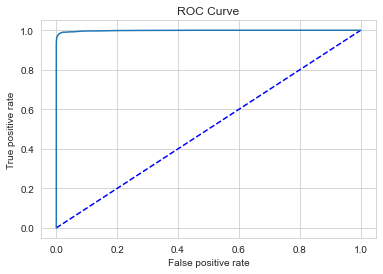

In [106]:
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Random Forrest Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [107]:
roc_auc_score(y_test,y_pred_prob)

0.9985168085949276

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lrModel=LogisticRegression()

In [110]:
lrModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
pred = lrModel.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.99156852248394


In [112]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6343
           1       0.99      0.96      0.97      1129

    accuracy                           0.99      7472
   macro avg       0.99      0.98      0.98      7472
weighted avg       0.99      0.99      0.99      7472



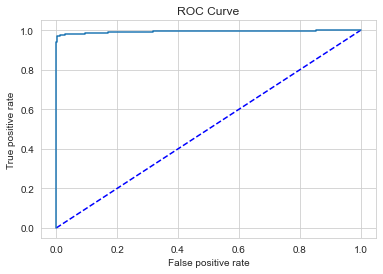

In [113]:
y_pred_prob=lrModel.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
pred = gnb.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.7315310492505354


In [116]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      6343
           1       0.35      0.88      0.50      1129

    accuracy                           0.73      7472
   macro avg       0.66      0.79      0.66      7472
weighted avg       0.88      0.73      0.77      7472



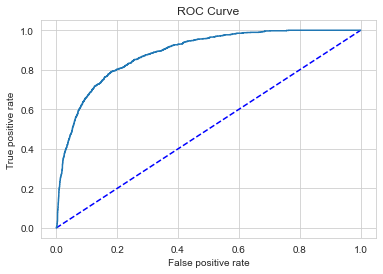

In [117]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [118]:
roc_auc_score(y_test,y_pred_prob)

0.8849550923184188

In [119]:
from sklearn.tree import DecisionTreeClassifier


In [120]:
dtc=DecisionTreeClassifier()

In [121]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
pred = dtc.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.986482869379015


In [123]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6343
           1       0.96      0.95      0.96      1129

    accuracy                           0.99      7472
   macro avg       0.97      0.97      0.97      7472
weighted avg       0.99      0.99      0.99      7472



In [124]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),GaussianNB()]

for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    accuracy=accuracy_score(y_test,pred)
    
    print("Accuracy for model {} is {}".format(model,accuracy))

Accuracy for model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.9850107066381156
Accuracy for model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                  